In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


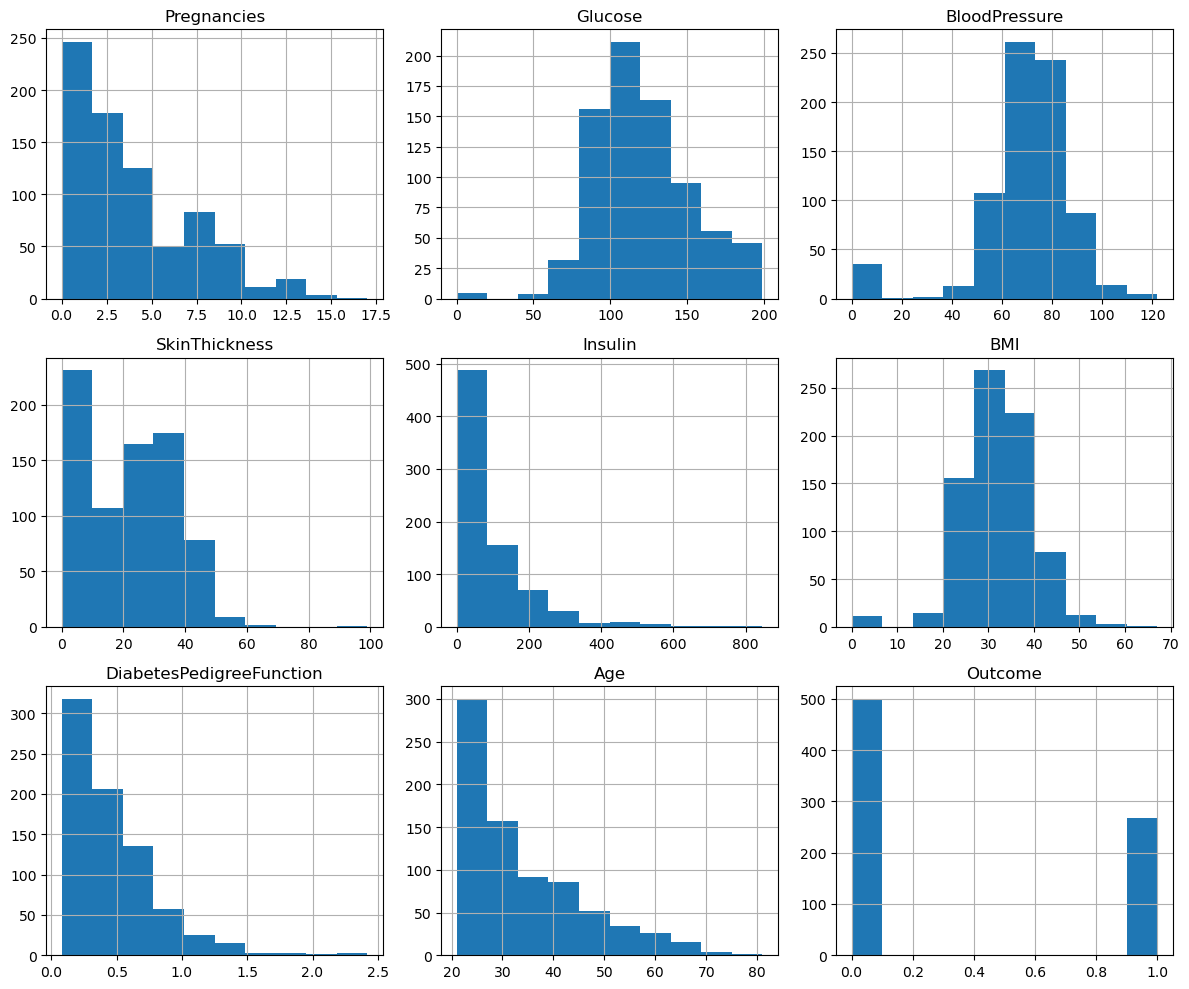

In [6]:
df.hist(bins=10, figsize=(12,10))
plt.tight_layout()
plt.show()

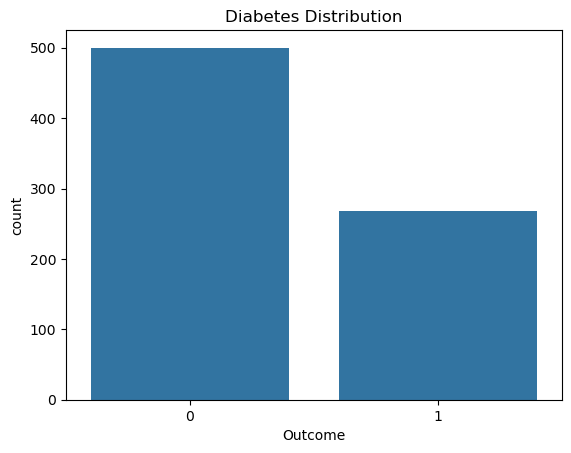

In [7]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Distribution")
plt.show()

In [8]:
# Replace zeroes with NaNs
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

# Impute missing values with mean or median
df.fillna(df.median(),inplace=True)

In [9]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.7445887445887446


In [13]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.696969696969697


In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.7359307359307359


In [15]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))

Gradient Boosting Accuracy: 0.7402597402597403


Evaluate Model Performance
Use various metrics like accuracy, confusion matrix, and classification report to evaluate each model’s performance.

In [16]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC Score
y_pred_proba = rf.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[129  21]
 [ 39  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231

ROC AUC Score: 0.8166666666666667


In [17]:
from sklearn.model_selection import GridSearchCV

# Example grid search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.7766182069920388


In [18]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print("Final Model Accuracy:", accuracy_score(y_test, final_predictions))

Final Model Accuracy: 0.7359307359307359


In [19]:
import joblib

# Save the model
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

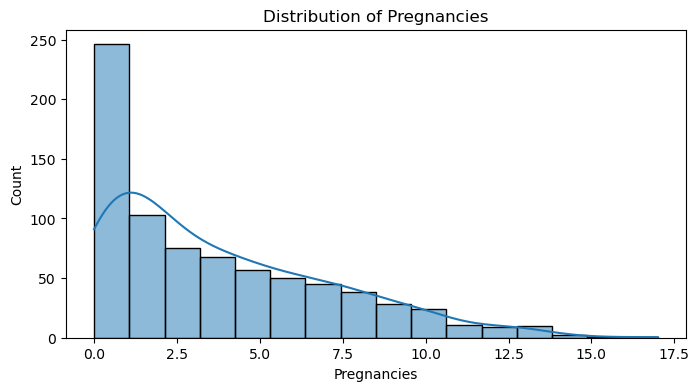

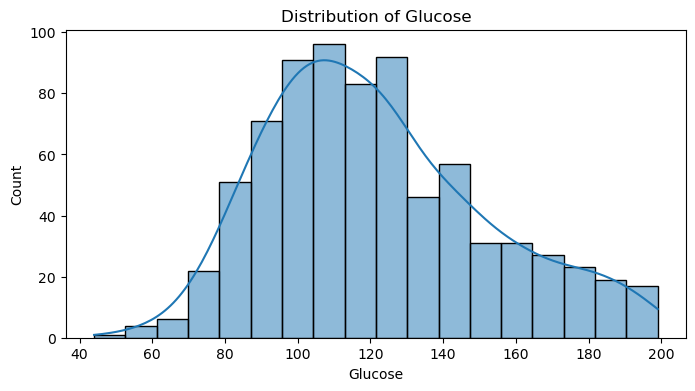

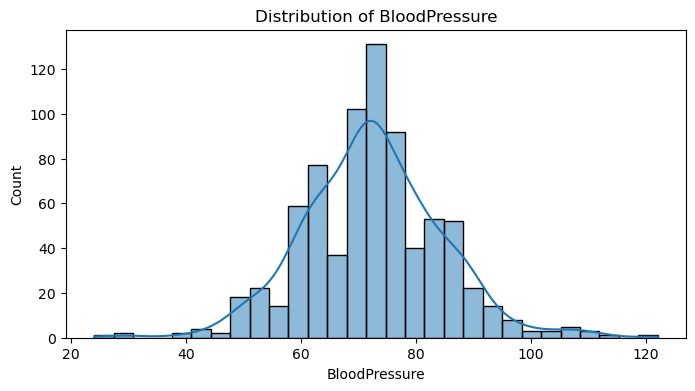

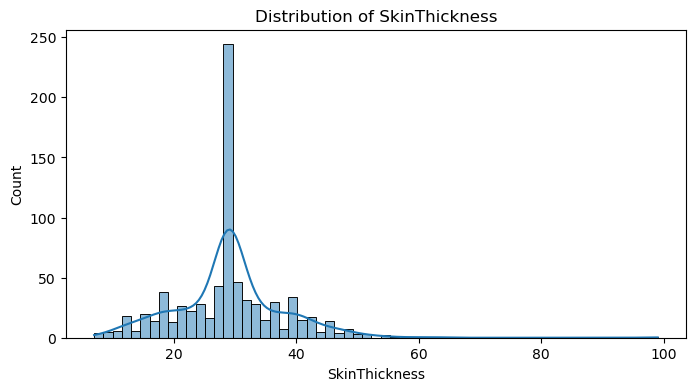

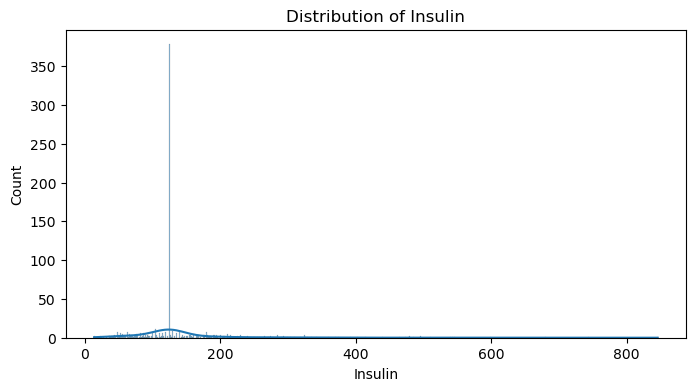

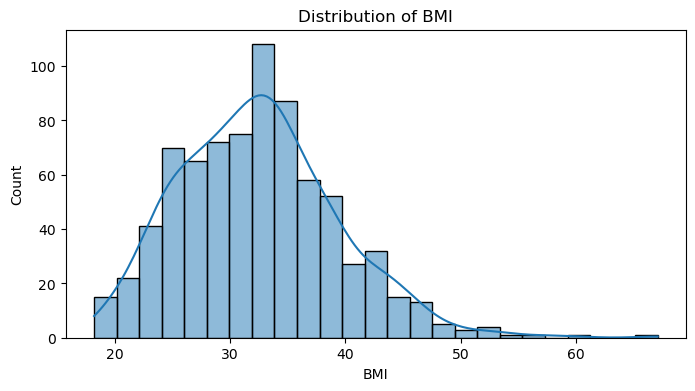

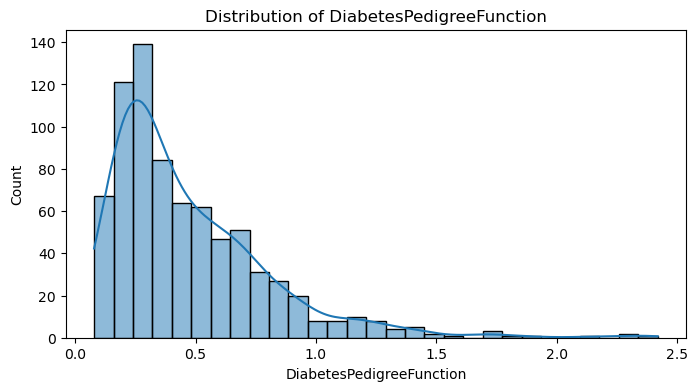

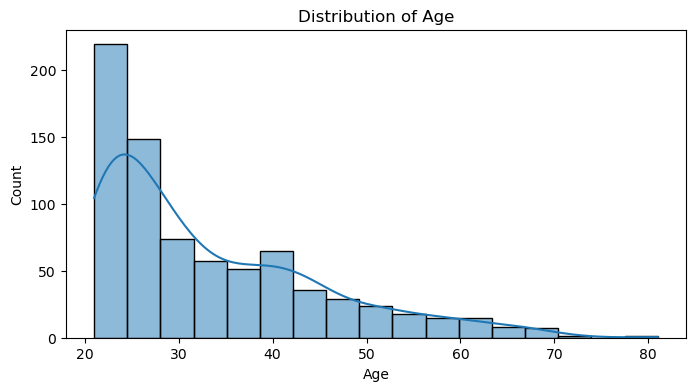

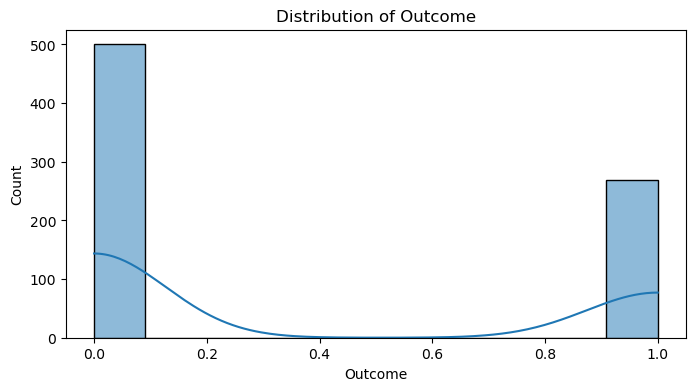

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


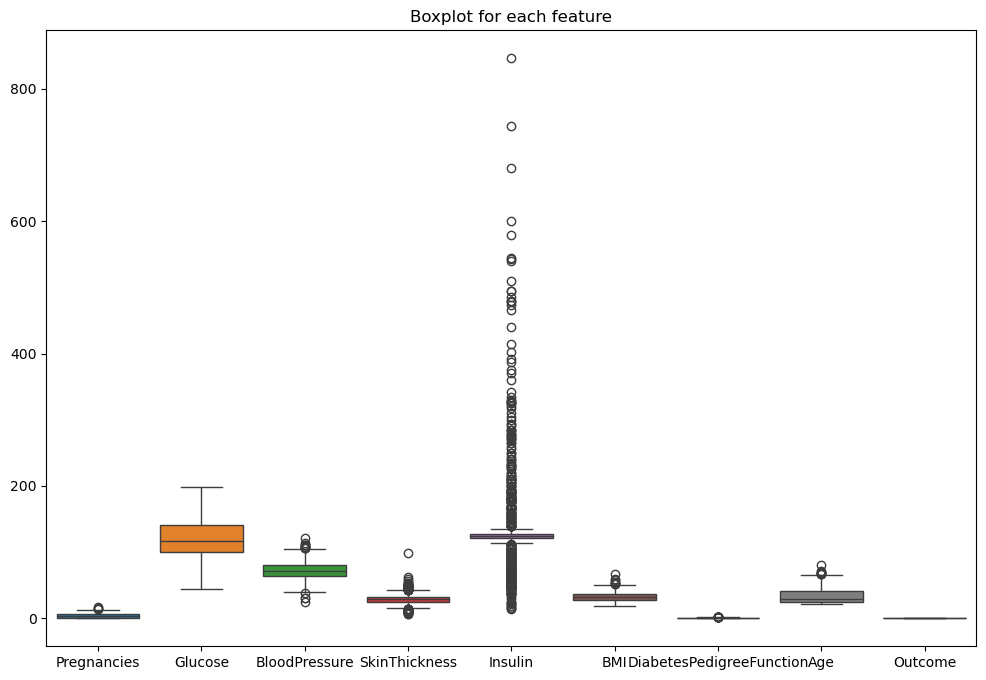

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot for each feature')
plt.show()


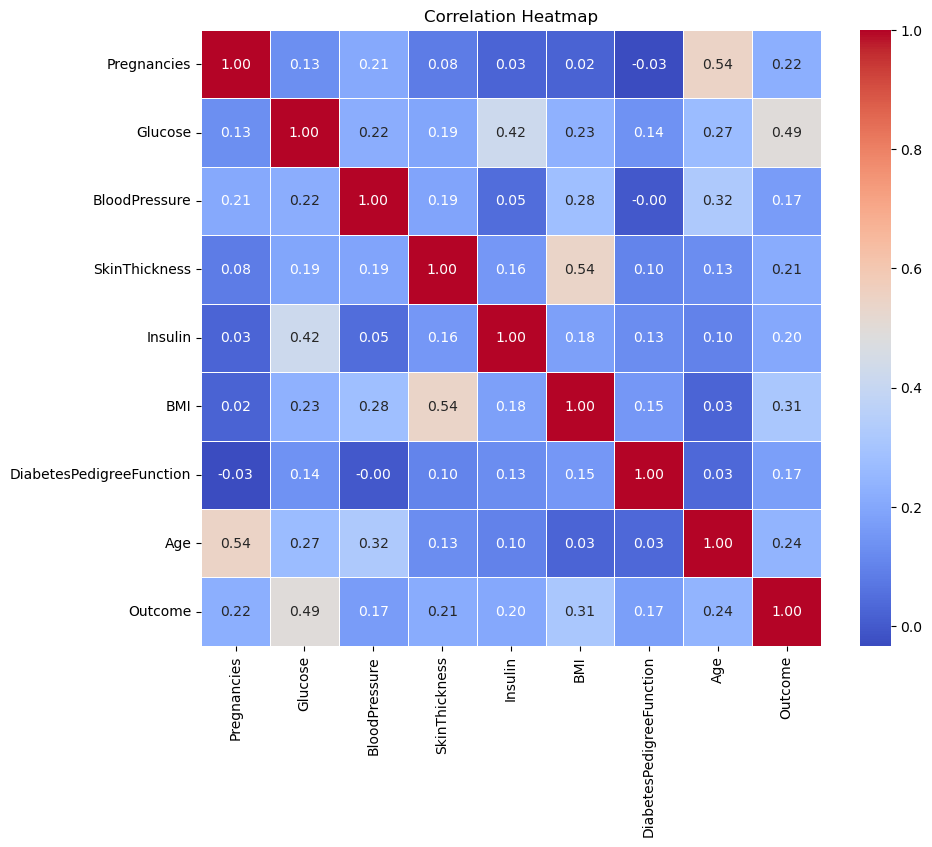

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


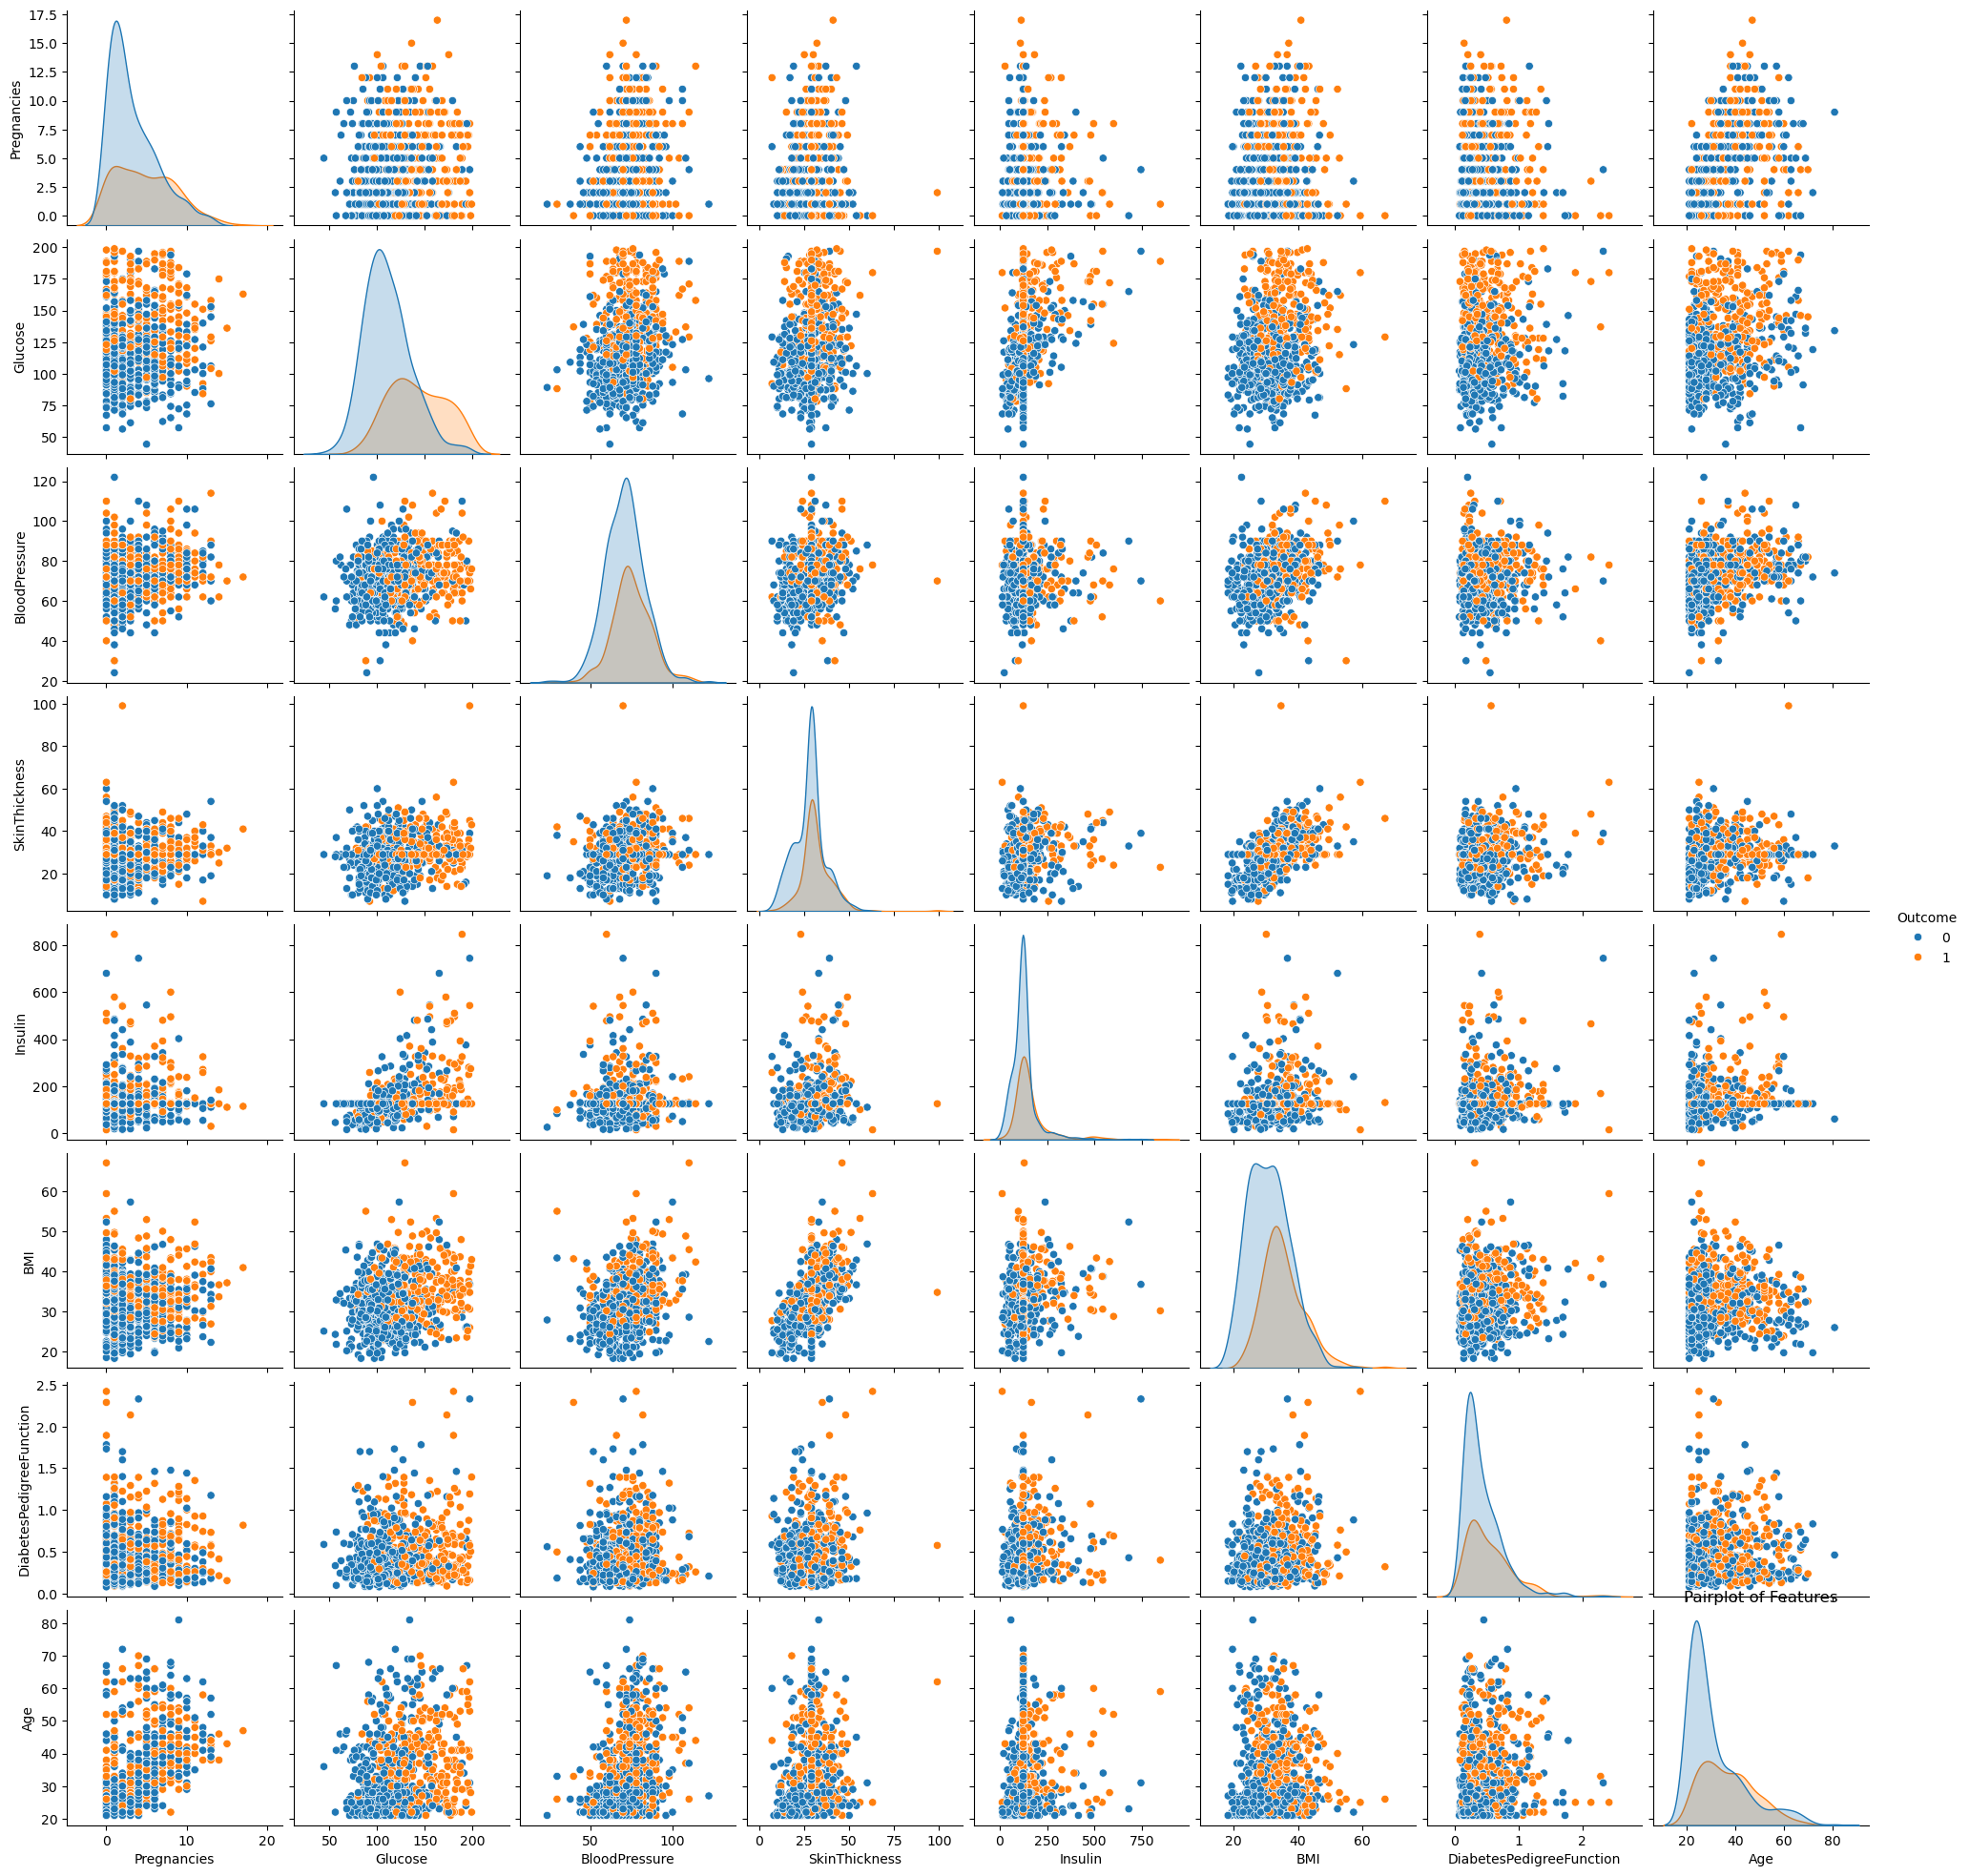

In [23]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.title('Pairplot of Features')
plt.show()


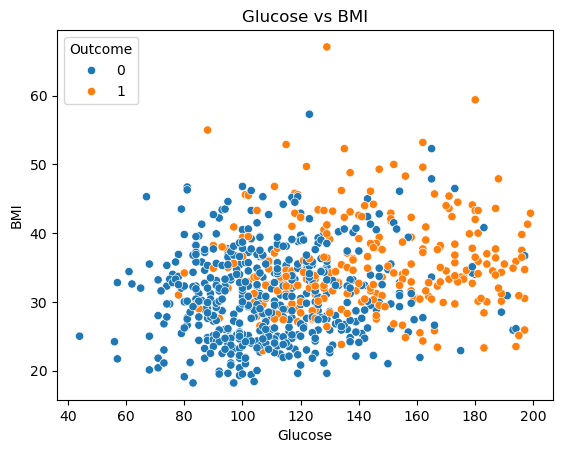

In [26]:
sns.scatterplot(x='Glucose', y='BMI', data=df, hue='Outcome')
plt.title('Glucose vs BMI')
plt.show()


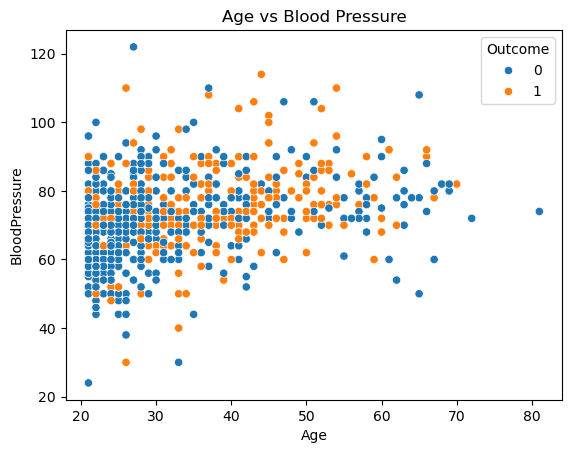

In [27]:
sns.scatterplot(x='Age', y='BloodPressure', data=df, hue='Outcome')
plt.title('Age vs Blood Pressure')
plt.show()


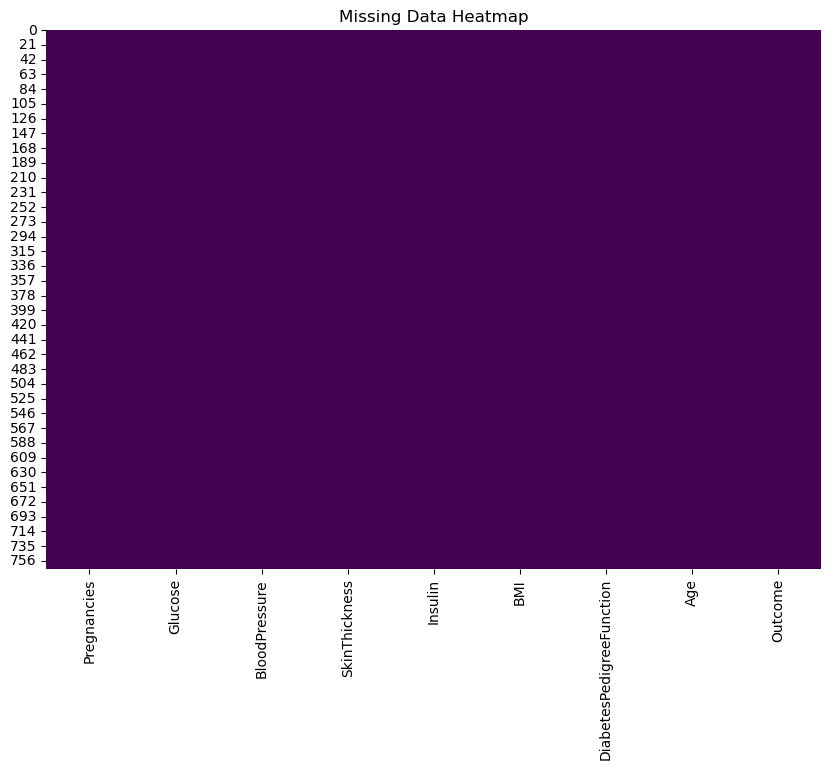

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

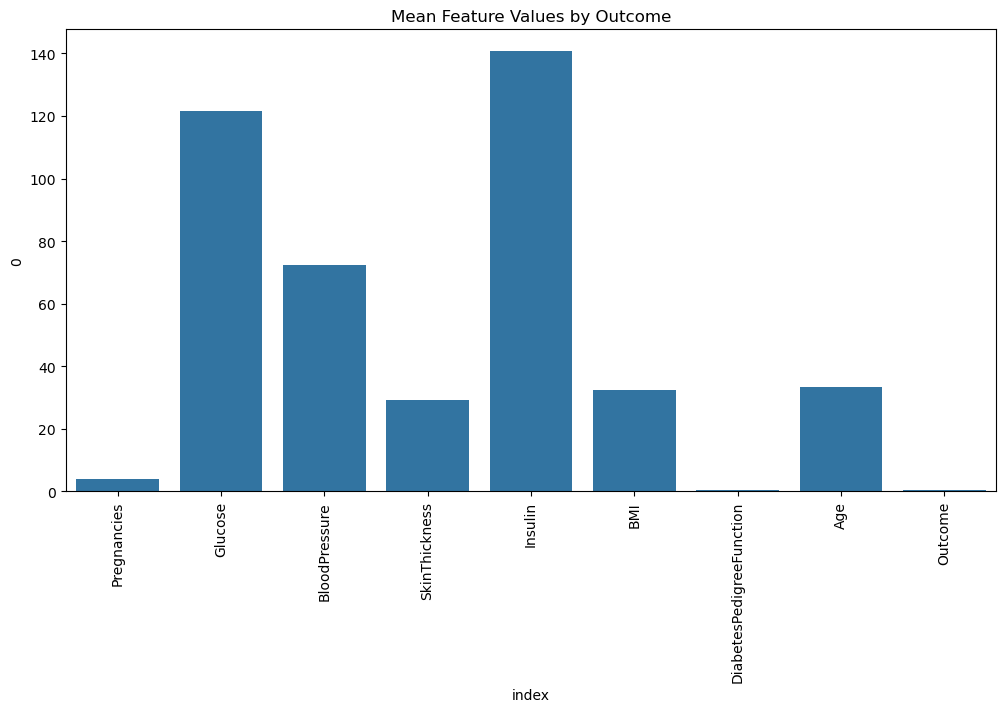

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.mean().reset_index(), x='index', y=0)
plt.xticks(rotation=90)
plt.title('Mean Feature Values by Outcome')
plt.show()

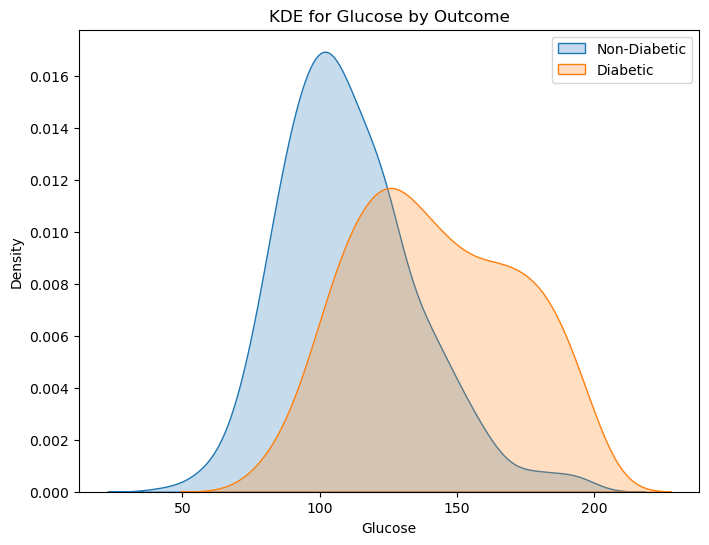

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Outcome'] == 0]['Glucose'], label='Non-Diabetic', fill=True)
sns.kdeplot(df[df['Outcome'] == 1]['Glucose'], label='Diabetic', fill=True)
plt.title('KDE for Glucose by Outcome')
plt.legend()
plt.show()


# 

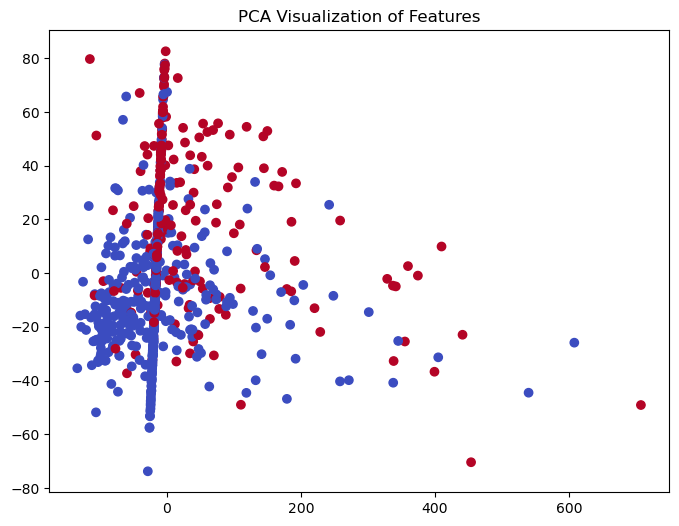

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('Outcome', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Outcome'], cmap='coolwarm')
plt.title('PCA Visualization of Features')
plt.show()


In [37]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


<Figure size 1200x800 with 0 Axes>

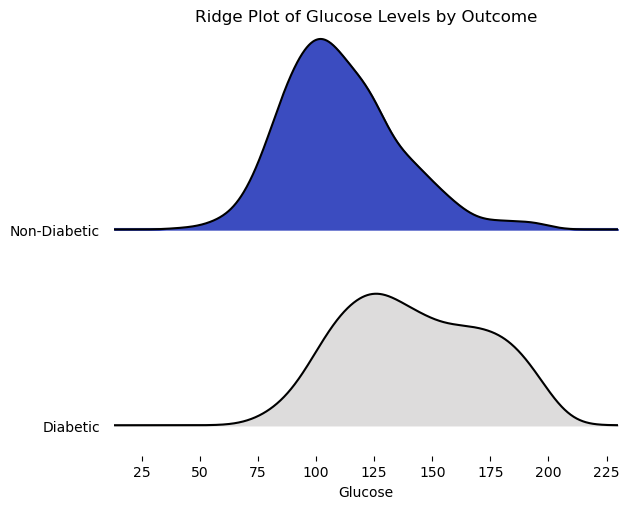

In [39]:
from joypy import joyplot
import matplotlib.pyplot as plt

# Creating the ridge plot
plt.figure(figsize=(12, 8))
joyplot(
    data=[df[df['Outcome'] == 0]['Glucose'], df[df['Outcome'] == 1]['Glucose']],
    labels=['Non-Diabetic', 'Diabetic'],
    overlap=0.5,
    colormap=plt.cm.coolwarm
)

# Adding title and labels
plt.title('Ridge Plot of Glucose Levels by Outcome')
plt.xlabel('Glucose')
plt.show()
